In [3]:
import pandas as pd
import seaborn  as sns
from datetime import datetime
import random
import matplotlib.pyplot as plt


In [4]:
DATA_rec = pd.read_csv("../FDA Registration Record/510k/pmnlstmn.txt", sep = "|",encoding='cp1252')
DATA_96cur = pd.read_csv("../FDA Registration Record/510k/pmn96cur.txt", sep = "|",encoding='cp1252')
DATA_9195 = pd.read_csv("../FDA Registration Record/510k/pmn9195.txt", sep = "|",encoding='cp1252')
DATA_8690 = pd.read_csv("../FDA Registration Record/510k/pmn8690.txt", sep = "|",encoding='cp1252')
DATA_8185 = pd.read_csv("../FDA Registration Record/510k/pmn8185.txt", sep = "|",encoding='cp1252')
DATA_7680 = pd.read_csv("../FDA Registration Record/510k/pmn7680.txt", sep = "|",encoding='cp1252')

DATA = pd.concat([DATA_rec, DATA_96cur, DATA_9195, DATA_8690, DATA_8185, DATA_7680])

if   len(DATA.index) == (len(DATA_rec) + len(DATA_96cur) + len(DATA_9195) + len(DATA_8690) + len(DATA_8185) + len(DATA_7680)):
    print(f"Datasets concat successfully!!\nTotal elements number is {len(DATA.index)}\n\n")

print(DATA.columns)

Datasets concat successfully!!
Total elements number is 158468


Index(['KNUMBER', 'APPLICANT', 'CONTACT', 'STREET1', 'STREET2', 'CITY',
       'STATE', 'COUNTRY_CODE', 'ZIP', 'POSTAL_CODE', 'DATERECEIVED',
       'DECISIONDATE', 'DECISION', 'REVIEWADVISECOMM', 'PRODUCTCODE',
       'STATEORSUMM', 'CLASSADVISECOMM', 'SSPINDICATOR', 'TYPE', 'THIRDPARTY',
       'EXPEDITEDREVIEW', 'DEVICENAME'],
      dtype='object')


In [3]:
DATA

,KNUMBER,APPLICANT,CONTACT,STREET1,STREET2,CITY,STATE,COUNTRY_CODE,ZIP,POSTAL_CODE,...,DECISION,REVIEWADVISECOMM,PRODUCTCODE,STATEORSUMM,CLASSADVISECOMM,SSPINDICATOR,TYPE,THIRDPARTY,EXPEDITEDREVIEW,DEVICENAME
0,DEN190035,"Helix OpCo, LLC",Gloria Lee,96 Colbeck Street,NaN,Toronto,NaN,CA,M6S1 V2,M6S1 V2,...,DENG,MG,QNC,NaN,MG,NaN,Direct,N,NaN,Helix Laboratory Platform
1,K190217,"Aidite (Qinhuangdao) Technology Co., Ltd.",Zhang Wei,"No.9 Dushan Road,Economic and Technological De...",NaN,Qinhuangdao,NaN,CN,066000,066000,...,SESE,DE,EBG,Summary,DE,NaN,Traditional,N,NaN,Aidite PMMA
2,K191978,"HuBDIC Co., Ltd.",Shin Jae-Ho,"301, 53 Jeonpa-ro, Mana-gu, Anyang-si, Gyongg-do",NaN,Anyang-si,NaN,KR,14084,14084,...,SESE,HO,FLL,Summary,HO,NaN,Traditional,N,NaN,Fever Garde
3,K192073,"Helix OpCo, LLC",Gloria Lee,96 Colbeck Street,NaN,Toronto,NaN,CA,M6S1 V2,M6S1 V2,...,SESE,IM,PTA,Summary,IM,NaN,Traditional,N,NaN,Helix Genetic Health Risk App for late-onset A...
4,K192308,"Wu's Tech Co., Ltd.",Jen Ke-Min,"No. 225, Yuan Peir St.",NaN,Hsin-Chu City,NaN,TW,30093,30093,...,SESE,PM,INI,Summary,PM,NaN,Traditional,N,NaN,Wu's Electrical Scooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460,K803151,"ABCO DEALERS, INC.",NaN,803 N. Front St. Suite 3,NaN,McHenry,IL,US,60050,60050,...,SESE,NE,GYB,NaN,NE,NaN,Traditional,N,NaN,"ECG & ULTRASOUND GELS, CREAMS & LOTION"
10461,K803165,"ZIMMER, INC.",NaN,803 N. Front St. Suite 3,NaN,McHenry,IL,US,60050,60050,...,SESE,OR,HXO,NaN,OR,NaN,Traditional,N,NaN,ACETABULAR CEMENT COMPRESSOR
10462,K803174,"CONPHAR, INC.",NaN,803 N. Front St. Suite 3,NaN,McHenry,IL,US,60050,60050,...,SESE,NE,GWZ,NaN,NE,NaN,Traditional,N,NaN,CONPHAR PERCUSSION HAMMER(BUCK TYPE)
10463,K803177,"DURO-MED IND., INC.",NaN,803 N. Front St. Suite 3,NaN,McHenry,IL,US,60050,60050,...,SESE,PM,IMA,NaN,PM,NaN,Traditional,N,NaN,MOIST HEAT PACK


# The objective is to find a variety of relationships between FDA Product Code and the average time taken for a final Decision:


## 1. From 1976 to now:

In [5]:
date_format = "%m/%d/%Y"
def cal_time_length(date1, date2):
    d0 = datetime.strptime(date1, date_format)
    d1 = datetime.strptime(date2, date_format)
    delta = d1 - d0
    return delta.days



### Distributions:

In [7]:
TIME_LENGTH_df = DATA[["PRODUCTCODE","DATERECEIVED", "DECISIONDATE", "COUNTRY_CODE", "APPLICANT"]]
recieved_date = TIME_LENGTH_df['DATERECEIVED'].tolist()
decision_date = TIME_LENGTH_df["DECISIONDATE"].tolist()
time_length = []
for i in range(len(recieved_date)):
    time_length.append(cal_time_length(recieved_date[i], decision_date[i]))
TIME_LENGTH_df['DECISIONMAKINGTIME(days)'] = time_length
AVERAGE_TIME = TIME_LENGTH_df.groupby('PRODUCTCODE', as_index= False)['DECISIONMAKINGTIME(days)'].mean()

In [8]:
print(f"total number of product code types from 1976 till now is {len(AVERAGE_TIME.index)}")
print(f"total case number from 1976 till now is {len(TIME_LENGTH_df)}")

total number of product code types from 1976 till now is 4447
total case number from 1976 till now is 158468


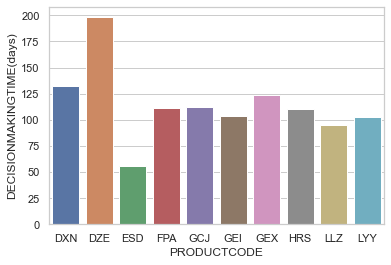

In [9]:
# The size of the entire dataset is too big, only we're taking only the 20 datasets with the highest overall frequency to be displayed on a graph for better visulization . 
TOP10 = TIME_LENGTH_df['PRODUCTCODE'].value_counts()[:10].index.tolist()
AVERAGE_TIME_TOP10 = AVERAGE_TIME.loc[AVERAGE_TIME['PRODUCTCODE'].isin(TOP10)]

sns.set_theme(style="whitegrid")
aver_t_plot = sns.barplot(x = "PRODUCTCODE", y = "DECISIONMAKINGTIME(days)", data = AVERAGE_TIME_TOP10)
plt.show()

In [ ]:
# Second of the top 20, can change number of product code by change the [10:20] to any other number range  
TOP20 = TIME_LENGTH_df['PRODUCTCODE'].value_counts()[10:20].index.tolist()
AVERAGE_TIME_TOP20 = AVERAGE_TIME.loc[AVERAGE_TIME['PRODUCTCODE'].isin(TOP20)]
AVERAGE_TIME_TOP20.head(20)

sns.set_theme(style="whitegrid")
aver_t_plot = sns.barplot(x = "PRODUCTCODE", y = "DECISIONMAKINGTIME(days)", data = AVERAGE_TIME_TOP20)
plt.show()

###  Top 20th most frequently apply product code from 1976 to now：

In [ ]:
Top20_productcode = TIME_LENGTH_df['PRODUCTCODE'].value_counts()[0:20].index.tolist()
Top20_productcode_counts = TIME_LENGTH_df['PRODUCTCODE'].value_counts()[0:20].tolist()
TIME_LENGTH_df['PRODUCTCODE'].value_counts()[0:20]

### The product code for the Longest Time:

In [ ]:
MAX_TIME_L = AVERAGE_TIME.sort_values(by=['DECISIONMAKINGTIME(days)'], ascending= False)
MAX_TIME_L.head(1)

### Result: The longest Time period of making decision is 2201 days for Product PBK from 1976 till now.

###  Top 5 product codes for the Shortest Application Time:

In [ ]:
MIN_TIME_L = AVERAGE_TIME.sort_values(by=['DECISIONMAKINGTIME(days)'])
MIN_TIME_L.head(5)

### Result: For product code DJH, it took less than 1 day to make decision, and for KIK, ESH, IFZ, OUC their average time length is 4 ,6, 6, 7 days.

# 2.  The below data focuses on the most recent timeframes

In [ ]:
TIME_LENGTH_df_rec = DATA_rec[["PRODUCTCODE","DATERECEIVED", "DECISIONDATE"]]
recieved_date = TIME_LENGTH_df_rec['DATERECEIVED'].tolist()
decision_date = TIME_LENGTH_df_rec["DECISIONDATE"].tolist()
time_length = []
for i in range(len(recieved_date)):
    time_length.append(cal_time_length(recieved_date[i], decision_date[i]))
TIME_LENGTH_df_rec['DECISIONMAKINGTIME(days)'] = time_length
AVERAGE_TIME_rec = TIME_LENGTH_df_rec.groupby('PRODUCTCODE', as_index= False)['DECISIONMAKINGTIME(days)'].mean()

### Distribution:

In [ ]:
print(f"total number of product code types recently is {len(AVERAGE_TIME_rec.index)}")
print(f"total case number recently is {len(TIME_LENGTH_df_rec)}")

## The top #1-#10 product codes and their average approval time:


In [ ]:
TOP10_rec = TIME_LENGTH_df_rec['PRODUCTCODE'].value_counts()[:10].index.tolist()
AVERAGE_TIME_TOP10_rec = AVERAGE_TIME_rec.loc[AVERAGE_TIME_rec['PRODUCTCODE'].isin(TOP10_rec)]

sns.set_theme(style="whitegrid")
aver_t_plot = sns.barplot(x = "PRODUCTCODE", y = "DECISIONMAKINGTIME(days)", data = AVERAGE_TIME_TOP10_rec)
plt.show()

## The top #10-#20 product codes and their average approval time:

In [ ]:
TOP20_rec = TIME_LENGTH_df_rec['PRODUCTCODE'].value_counts()[10:20].index.tolist()
AVERAGE_TIME_TOP20_rec = AVERAGE_TIME_rec.loc[AVERAGE_TIME_rec['PRODUCTCODE'].isin(TOP20_rec)]
AVERAGE_TIME_TOP20_rec.head(20)

sns.set_theme(style="whitegrid")
aver_t_plot = sns.barplot(x = "PRODUCTCODE", y = "DECISIONMAKINGTIME(days)", data = AVERAGE_TIME_TOP20_rec)
plt.show()

###  Top 20 most frequently applied product codes recently：

In [ ]:
Top20_productcode = TIME_LENGTH_df_rec['PRODUCTCODE'].value_counts()[0:20].index.tolist()
Top20_productcode_counts = TIME_LENGTH_df_rec['PRODUCTCODE'].value_counts()[0:20].tolist()
TIME_LENGTH_df_rec['PRODUCTCODE'].value_counts()[0:20]

### Longest Time Length Recently:

In [ ]:
MAX_TIME_L_rec = AVERAGE_TIME_rec.sort_values(by=['DECISIONMAKINGTIME(days)'], ascending= False)
MAX_TIME_L_rec.head(1)

### Result: The longest Time period of making decision is 682 days for Product EBG recently.

### Shortest Time Length Recently:

In [ ]:
MIN_TIME_L_rec = AVERAGE_TIME_rec.sort_values(by=['DECISIONMAKINGTIME(days)'])
MIN_TIME_L_rec.head(1)

### Result: The shortest Time period of making decision is 14 days for Product DQO recently.

# 3. From 1996 to Now:

In [ ]:
TIME_LENGTH_df_96 = DATA_96cur[["PRODUCTCODE","DATERECEIVED", "DECISIONDATE"]]
recieved_date = TIME_LENGTH_df_96['DATERECEIVED'].tolist()
decision_date = TIME_LENGTH_df_96["DECISIONDATE"].tolist()
time_length = []
for i in range(len(recieved_date)):
    time_length.append(cal_time_length(recieved_date[i], decision_date[i]))
TIME_LENGTH_df_96['DECISIONMAKINGTIME(days)'] = time_length
AVERAGE_TIME_96 = TIME_LENGTH_df_96.groupby('PRODUCTCODE', as_index= False)['DECISIONMAKINGTIME(days)'].mean()

### Distributions:

In [ ]:
print(f"total number of product code types from 1996 till now is {len(AVERAGE_TIME_96.index)}")
print(f"total case number recently from 1996 till now is {len(TIME_LENGTH_df_96)}")

In [ ]:
TOP10_96 = TIME_LENGTH_df_96['PRODUCTCODE'].value_counts()[:10].index.tolist()
AVERAGE_TIME_TOP10_96 = AVERAGE_TIME_96.loc[AVERAGE_TIME_96['PRODUCTCODE'].isin(TOP10)]

sns.set_theme(style="whitegrid")
aver_t_plot = sns.barplot(x = "PRODUCTCODE", y = "DECISIONMAKINGTIME(days)", data = AVERAGE_TIME_TOP10_96)
plt.show()

In [ ]:
TOP20_96 = TIME_LENGTH_df_96['PRODUCTCODE'].value_counts()[10:20].index.tolist()
AVERAGE_TIME_TOP20_96 = AVERAGE_TIME_96.loc[AVERAGE_TIME_96['PRODUCTCODE'].isin(TOP20_96)]
AVERAGE_TIME_TOP20_96.head(20)

sns.set_theme(style="whitegrid")
aver_t_plot = sns.barplot(x = "PRODUCTCODE", y = "DECISIONMAKINGTIME(days)", data = AVERAGE_TIME_TOP20_96)
plt.show()

###  Top 20th most frequently apply product code from 1996 till now：

In [ ]:
Top20_productcode = TIME_LENGTH_df_96['PRODUCTCODE'].value_counts()[0:20].index.tolist()
Top20_productcode_counts = TIME_LENGTH_df_96['PRODUCTCODE'].value_counts()[0:20].tolist()
TIME_LENGTH_df_96['PRODUCTCODE'].value_counts()[0:20]

### Longest Time Length (1996 till now):

In [ ]:
MAX_TIME_L_96 = AVERAGE_TIME_96.sort_values(by=['DECISIONMAKINGTIME(days)'], ascending= False)
MAX_TIME_L_96.head(1)

### Result: The longest Time period of making decision is 2201 days for Product PBK recently.

### Shortest Time Length (1996 TILL NOW):

In [ ]:
MIN_TIME_L_96 = AVERAGE_TIME_96.sort_values(by=['DECISIONMAKINGTIME(days)'])
MIN_TIME_L_96.head(1)

### Result: The shortest Time period of making decision is 7 days for Product OUC recently.

---

# Find the trend of 510k applicant from the pass 30 years

---


In [ ]:
DATA_30years = pd.concat([DATA_rec, DATA_96cur,DATA_9195])


In [ ]:
received_date = DATA_30years['DATERECEIVED'].tolist()
received_year = []
for date in received_date:
    new_date = datetime.strptime(str(date), date_format)
    received_year.append(new_date.year)
DATA_30years['YEARRECEIVED'] = received_year

## 1, PRODUCT CODE TREND


In [ ]:
DATA_30YEARS_PC = DATA_30years[["PRODUCTCODE", "YEARRECEIVED"]]

In [ ]:
DATA_1020_PC = DATA_30YEARS_PC[DATA_30YEARS_PC['YEARRECEIVED'] >= 2010]
DATA_0010_PC = DATA_30YEARS_PC[DATA_30YEARS_PC['YEARRECEIVED'].isin(range(2000,2010))]
DATA_9000_PC = DATA_30YEARS_PC[DATA_30YEARS_PC['YEARRECEIVED'] < 2000]
if len(DATA_30YEARS_PC.index) == (len(DATA_0010_PC.index) + len(DATA_9000_PC.index)  +  len(DATA_1020_PC.index)):
    print('Split successfully!')
else:
    print(len(DATA_30YEARS_PC.index))
    print((len(DATA_0010_PC.index) + len(DATA_9000_PC.index)  +  len(DATA_1020_PC.index)))

In [ ]:
TOP10_1020_PC = DATA_1020_PC['PRODUCTCODE'].value_counts().index[0:10].tolist()
TOP10_1020_Count = DATA_1020_PC['PRODUCTCODE'].value_counts()[0:10].tolist()

sns.set_theme(style="whitegrid")
TOP10_1020_P_plot = sns.barplot( TOP10_1020_PC, TOP10_1020_Count)
plt.show()



In [ ]:
TOP10_0010_PC = DATA_0010_PC['PRODUCTCODE'].value_counts().index[0:10].tolist()
TOP10_0010_Count = DATA_0010_PC['PRODUCTCODE'].value_counts()[0:10].tolist()
sns.set_theme(style="whitegrid")
TOP10_0010_P_plot = sns.barplot( TOP10_0010_PC, TOP10_0010_Count)
plt.show()

In [ ]:
TOP10_9000_PC = DATA_9000_PC['PRODUCTCODE'].value_counts().index[0:10].tolist()
TOP10_9000_Count = DATA_9000_PC['PRODUCTCODE'].value_counts()[0:10].tolist()

sns.set_theme(style="whitegrid")
TOP10_9000_P_plot = sns.barplot( TOP10_9000_PC, TOP10_9000_Count)
plt.show()

In [ ]:
COMMON_PC = []
for i in range(10):
    if TOP10_1020_PC[i] in TOP10_0010_PC and TOP10_1020_PC[i] in TOP10_9000_PC:
        COMMON_PC.append(TOP10_1020_PC[i])

print(f"The most common product codes that dominate each decade are {COMMON_PC}")

In [ ]:
DATA_30years_PC_year = DATA_30years[['PRODUCTCODE','YEARRECEIVED']]
DATA_COMMON = DATA_30years_PC_year[DATA_30years_PC_year["PRODUCTCODE"].isin(COMMON_PC)]
DATA_COMMON

In [ ]:
COMMON_PC_YEAR_COUNT = DATA_COMMON.groupby(["PRODUCTCODE", "YEARRECEIVED"], as_index = False).size()

In [ ]:
sns.lineplot(data=COMMON_PC_YEAR_COUNT, x="YEAR RECEIVED", y="Size", hue="PRODUCT CODE")

## 2. Trends by country of origin

In [ ]:
# Main dataframe is DATA_30years
DATA_30YEARS_CY = DATA_30years[["COUNTRY_CODE","YEARRECEIVED"]]
DATA_30YEARS_CY

In [ ]:
DATA_1020_CY = DATA_30YEARS_CY[DATA_30YEARS_CY['YEARRECEIVED'] >= 2010]
DATA_0010_CY = DATA_30YEARS_CY[DATA_30YEARS_CY['YEARRECEIVED'].isin(range(2000,2010))]
DATA_9000_CY = DATA_30YEARS_CY[DATA_30YEARS_CY['YEARRECEIVED'] < 2000]
if len(DATA_30YEARS_CY.index) == (len(DATA_1020_CY.index) + len(DATA_0010_CY.index)  +  len(DATA_9000_CY.index)):
    print('Split successfully!')
else:
    print(len(DATA_30YEARS_CY.index))
    print((len(DATA_1020_CY.index) + len(DATA_0010_CY.index)  +  len(DATA_9000_CY.index)))

# Dominant countries and their number of applications visualied throughout 3 decades

In [ ]:
TOP10_1020_CY = DATA_1020_CY['COUNTRY_CODE'].value_counts().index[0:10].tolist()
TOP10_1020_CY_Count = DATA_1020_CY['COUNTRY_CODE'].value_counts()[0:10].tolist()

sns.set_theme(style="whitegrid")
TOP10_1020_C_plot = sns.barplot( TOP10_1020_CY, TOP10_1020_CY_Count)
plt.show()

In [ ]:
TOP10_0010_CY = DATA_0010_CY['COUNTRY_CODE'].value_counts().index[0:10].tolist()
TOP10_0010_CY_Count = DATA_0010_CY['COUNTRY_CODE'].value_counts()[0:10].tolist()

sns.set_theme(style="whitegrid")
TOP10_0010_C_plot = sns.barplot( TOP10_0010_CY, TOP10_0010_CY_Count)
plt.show()

In [ ]:
TOP10_9000_CY = DATA_9000_CY['COUNTRY_CODE'].value_counts().index[0:10].tolist()
TOP10_9000_CY_Count = DATA_9000_CY['COUNTRY_CODE'].value_counts()[0:10].tolist()

sns.set_theme(style="whitegrid")
TOP10_9000_C_plot = sns.barplot( TOP10_9000_CY, TOP10_9000_CY_Count)
plt.show()

In [ ]:
COMMON_CY = []
for i in range(10):
    if TOP10_1020_CY[i] in TOP10_0010_CY and TOP10_1020_CY[i] in TOP10_9000_CY:
        COMMON_CY.append(TOP10_1020_CY[i])

print(f"The most common country where the applicants that dominate each decade from are {COMMON_CY}")

In [ ]:
DATA_30years_CY_year = DATA_30years[['COUNTRY_CODE','YEARRECEIVED']]
DATA_COMMON_CY = DATA_30years_CY_year[DATA_30years_CY_year["COUNTRY_CODE"].isin(COMMON_CY)]

In [ ]:
COMMON_CY_YEAR_COUNT = DATA_COMMON_CY.groupby(["COUNTRY_CODE", "YEARRECEIVED"], as_index = False).size()
COMMON_CY_YEAR_COUNT_US = COMMON_CY_YEAR_COUNT[COMMON_CY_YEAR_COUNT["COUNTRY_CODE"] == "US"]
COMMON_CY_YEAR_COUNT_OTHER = COMMON_CY_YEAR_COUNT[COMMON_CY_YEAR_COUNT["COUNTRY_CODE"] != "US"]

In [ ]:
# Since the number of US applicants is faily large, in order for better visualization the trend for the US has been seperated from the other 5 common countries. 
sns.lineplot(data=COMMON_CY_YEAR_COUNT_US, x="YEARRECEIVED", y="size", hue="COUNTRY_CODE")

In [ ]:
sns.lineplot(data=COMMON_CY_YEAR_COUNT_OTHER, x="YEARRECEIVED", y="size", hue="COUNTRY_CODE")

## 3. Applicants by corporation and their most dominant trends:

In [ ]:
# Main dataframe is DATA_30years
DATA_30YEARS_AP = DATA_30years[["APPLICANT", "YEARRECEIVED"]]
DATA_30YEARS_AP

In [ ]:
DATA_1020_AP = DATA_30YEARS_AP[DATA_30YEARS_AP['YEARRECEIVED'] >= 2010]
DATA_0010_AP = DATA_30YEARS_AP[DATA_30YEARS_AP['YEARRECEIVED'].isin(range(2000,2010))]
DATA_9000_AP = DATA_30YEARS_AP[DATA_30YEARS_AP['YEARRECEIVED'] < 2000]
if len(DATA_30YEARS_AP.index) == (len(DATA_1020_AP.index) + len(DATA_0010_AP.index)  +  len(DATA_9000_AP.index)):
    print('Split successfully!')
else:
    print(len(DATA_30YEARS_AP.index))
    print((len(DATA_1020_AP.index) + len(DATA_0010_AP.index)  +  len(DATA_9000_AP.index)))

## Most dominant corpoations and their frequency of applications through the decades

In [ ]:
TOP10_1020_AP = DATA_1020_AP['APPLICANT'].value_counts().index[0:10].tolist()
TOP10_1020_AP_Count = DATA_1020_AP['APPLICANT'].value_counts()[0:10].tolist()

sns.set_theme(style="whitegrid")
TOP10_1020_AP_plot = sns.barplot( TOP10_1020_AP, TOP10_1020_AP_Count)
TOP10_1020_AP_plot.set_xticklabels(TOP10_1020_AP_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()

In [ ]:
TOP10_0010_AP = DATA_0010_AP['APPLICANT'].value_counts().index[0:10].tolist()
TOP10_0010_AP_Count = DATA_0010_AP['APPLICANT'].value_counts()[0:10].tolist()

sns.set_theme(style="whitegrid")
TOP10_0010_AP_plot = sns.barplot( TOP10_0010_AP, TOP10_0010_AP_Count)
TOP10_0010_AP_plot.set_xticklabels(TOP10_0010_AP_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()

In [ ]:
TOP10_9000_AP = DATA_9000_AP['APPLICANT'].value_counts().index[0:10].tolist()
TOP10_9000_AP_Count = DATA_9000_AP['APPLICANT'].value_counts()[0:10].tolist()

sns.set_theme(style="whitegrid")
TOP10_9000_AP_plot = sns.barplot( TOP10_9000_AP, TOP10_9000_AP_Count)
TOP10_9000_AP_plot.set_xticklabels(TOP10_9000_AP_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()

In [ ]:
COMMON_AP = []
for i in range(10):
    if TOP10_1020_AP[i] in TOP10_0010_AP and TOP10_1020_AP[i] in TOP10_9000_AP:
        COMMON_AP.append(TOP10_1020_AP[i])

print(f"The most common applicants that dominate each decade from are {COMMON_AP}")

# The number of applications per top 10 coprorations

In [ ]:
TOP10_30Y_MODE_AP = DATA_30YEARS_AP['APPLICANT'].value_counts()[:10].index.tolist()
TOP10_30Y_MODE_AP_VALUE = DATA_30YEARS_AP['APPLICANT'].value_counts()[:10].tolist()
DATA_30YEARS_AP['APPLICANT'].value_counts()[:10]

In [ ]:
TOP3_30Y_MODE_AP =  TOP10_30Y_MODE_AP[0:3]
TOP10_30Y_MODE_AP =  TOP10_30Y_MODE_AP[3:10]
TOP3_30Y_MODE_AP


In [ ]:
DATA_TOP3_AP = DATA_30YEARS_AP[DATA_30YEARS_AP["APPLICANT"].isin(TOP3_30Y_MODE_AP)]
DATA_TOP3_AP_COUNT = DATA_TOP3_AP.groupby(["APPLICANT", "YEARRECEIVED"], as_index = False).size()
DATA_30YEARS_AP[DATA_30YEARS_AP["APPLICANT"].isin(TOP3_30Y_MODE_AP)]
DATA_TOP3_AP_COUNT

In [ ]:
## The Annual Trends of the Top 3 Applicant Corporations 

In [ ]:
sns.lineplot(data=DATA_TOP3_AP_COUNT, x="YEARRECEIVED", y="size", hue="APPLICANT").set_title("Top 3 companies applications number annually change")

## Note: the Siemens Medical Solutions Inc USA seems to be the most stable and consistent company through the time periods

## 4. Number of Applicants Trend from 1995 to 2015

In [ ]:
# Main dataframe is DATA_30years
APPLICANT_YEAR = DATA_30years[['YEARRECEIVED']]
APPLICANT_YEAR

In [ ]:
AP_NUM_15 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'] >= 2015]
AP_NUM_10 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'].isin(range(2010,2015))]
AP_NUM_05 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'].isin(range(2005,2010))]
AP_NUM_00 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'].isin(range(2000,2005))]
AP_NUM_95 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'].isin(range(1995,2000))]
AP_NUM_90 = APPLICANT_YEAR[APPLICANT_YEAR['YEARRECEIVED'] < 1995]
if (len(AP_NUM_15) + len(AP_NUM_10) + len(AP_NUM_05) + len(AP_NUM_00) + len(AP_NUM_95) + len(AP_NUM_90)) == len(APPLICANT_YEAR):
    print("split successfully!")
else:
    print(f"Splitted number is {(len(AP_NUM_15) + len(AP_NUM_10) + len(AP_NUM_05) + len(AP_NUM_00) + len(AP_NUM_95) + len(AP_NUM_90))}")
    print(f'Total Number is {len(APPLICANT_YEAR)}')


In [ ]:
d = {"Period":[ "1995", "2000", "2005", "2010", "2015", "2020"], "Number"  : [ len(AP_NUM_90),  len(AP_NUM_95), len(AP_NUM_00), len(AP_NUM_05), len(AP_NUM_10), len(AP_NUM_15),]}
APP_NUMBER_TREND = pd.DataFrame(data  = d)
APP_NUMBER_TREND

In [ ]:
sns.lineplot(data=APP_NUMBER_TREND, x="Period", y="Number").set_title("Applicants per year trend in past 30 years!")
plt.show()

# Specific Analytics of the Top 3 most consistent product codes of each decade (the 90s, early 2000s, and 2010-2020)

### The most successful companies behind the high frequency of the GEX (Laser surgical implementations) product code

In [ ]:
DATA_TOPInc_PC = DATA_30years.groupby(["PRODUCTCODE","APPLICANT"], as_index = False).size()
DATA_TOPInc_PC_GEX = DATA_TOPInc_PC[DATA_TOPInc_PC['PRODUCTCODE'] == "GEX"]
DATA_TOPInc_PC_GEX.sort_values(by=['size'], ascending = False).head(10)


### The most successful companies behind the high frequency of the GEI (Electrosurgical cutting and coagulation devices) product code 

In [ ]:
DATA_TOPInc_PC = DATA_30years.groupby(["PRODUCTCODE","APPLICANT"], as_index = False).size()
DATA_TOPInc_PC_GEX = DATA_TOPInc_PC[DATA_TOPInc_PC['PRODUCTCODE'] == "GEI"]
DATA_TOPInc_PC_GEX.sort_values(by=['size'], ascending = False).head(10)

### The most successful companies behind the high frequency of the DZE (Dental implants) product code 

In [ ]:
DATA_TOPInc_PC = DATA_30years.groupby(["PRODUCTCODE","APPLICANT"], as_index = False).size()
DATA_TOPInc_PC_GEX = DATA_TOPInc_PC[DATA_TOPInc_PC['PRODUCTCODE'] == "DZE"]
DATA_TOPInc_PC_GEX.sort_values(by=['size'], ascending = False).head(10)

## The Shortest Application time frames from China since 1996

In [ ]:
MIN_TIME_L_96_CN = TIME_LENGTH_df[TIME_LENGTH_df["COUNTRY_CODE"] == "CN"]
MIN_TIME_L_96_CN.sort_values(by=['DECISIONMAKINGTIME(days)']).head(5)

##### The IYN product code refers to products that are catagorized as -> ultrasonic pulsed doppler imaging systems
##### The DSA product code refers to products that are catagorizedd as -> Electrode Transducers and Cardiovascular devices
##### The LYZ product code refers to products  that are categorized as -> Non-powdered patient examination gloves

## The Longest Time frames from China since 1996

In [ ]:
MIN_TIME_L_96_CN = TIME_LENGTH_df[TIME_LENGTH_df["COUNTRY_CODE"] == "CN"]
MIN_TIME_L_96_CN.sort_values(by=['DECISIONMAKINGTIME(days)'], ascending= False).head(5)

## Most frequently appearing China based applicant

In [ ]:
DATA_TOPInc_PC = DATA_30years.groupby(["COUNTRY_CODE","APPLICANT"], as_index = False).size()
DATA_TOPInc_PC_GEX = DATA_TOPInc_PC[DATA_TOPInc_PC['COUNTRY_CODE'] == "CN"]
DATA_TOPInc_PC_GEX.sort_values(by=['size'], ascending = False).head(10)

### The top product code from the most frequently appearing China based company

In [ ]:
DATA_TOPInc_PC = DATA_30years.groupby(["COUNTRY_CODE","APPLICANT","PRODUCTCODE"], as_index = False).size()
DATA_TOPInc_PC_GEX = DATA_TOPInc_PC[DATA_TOPInc_PC['APPLICANT'] == "ANDON HEALTH CO.,LTD"]
DATA_TOPInc_PC_GEX.sort_values(by=['size'], ascending = False).head(10)

#### For context, The DXN product code refers to -> Noninvasive blood pressure measurement systems of the cardiovascular category

### Follow up -> China based applicants

## Collected the K number cases for the most successful applicants from previous years based on popular PureFDA product codes (FXX, LZA, FYA, QBD, JSM, JSG,GEX, FLL)

### -> Time taken With Third Party review

In [ ]:
DATA_30years_PFDACodes = DATA_30years.groupby (["COUNTRY_CODE","APPLICANT","PRODUCTCODE","510(K) NUMBER","DECISIONMAKINGTIME(days)","THIRD PARTY FLAG"])
DATA_30years_PFDACodesPT2 = [DATA_30years_PFDACodes["THIRD PARTY FLAG"] == 'Y']
DATA_30years_PFDACodesPT2.sort_values(by=['DECISIONMAKINGTIME(days)'], ascending = False).head(20)

DATA_30years_PFDACodes_plotdata = DATA_30years[['PRODUCTCODE'] == "FXX, LZA, FYA, QBD, JSM, JSG, GEX, FLL"]].value_counts().index[0:10].tolist()
DATA_30years_PFDACodes_count = DATA_30years['size'].value_counts()[0:10].tolist()

sns.set_theme(style="whitegrid")
DATA_30years_PFDACodes_plot = sns.barplot( DATA_30years_PFDACodes, DATA_30years_PFDACodes_count)
DATA_30years_PFDACodes_Plot.set_xticklabels(DATA_30years_PFDACodes_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()

sns.lineplot(data=DATA_30years_PFDACodes_plotdata, x="DATERECEIVED", y="size", hue="PRODUCTCODE")

### -> Time Taken Without Third Party review

In [ ]:
DATA_30years_PFDACodes = DATA_30years.groupby (["COUNTRY_CODE","APPLICANT","PRODUCTCODE","510(K) NUMBER","DECISIONMAKINGTIME(days)"])
DATA_30years_PFDACodes_plotdata = DATA_30years_PFDACodes[['510(K) NUMBER'] == "FXX, LZA, FYA, QBD, JSM, JSG,GEX, FLL"]].value_counts().index[0:10].tolist()
DATA_30years_PFDACodes_count = DATA_30years_PFDACodes['size'].value_counts()[0:10].tolist()
DATA_30years_PFDACodes_plotdata.sort_values(by=['DECISIONMAKINGTIME(days)'], ascending = False).head(10)

sns.set_theme(style="whitegrid")
DATA_30years_PFDACodes_plotdata = sns.barplot( DATA_30years_PFDACodes, DATA_30years_PFDACodes_count)
DATA_30years_PFDACodes_plotdata.set_xticklabels(DATA_30years_PFDACodes_plotdata.get_xticklabels(), rotation=40, ha="right")

plt.title('Decision Making Time for PureFDAs Most Popular Product Codes(Sans Third Party Review)')
plt.show()

## Trend of product popular Purefda codes over time

In [ ]:
sns.lineplot(data=DATA_30years_PFDACodes_plotdata, x="DATERECEIVED", y="size", hue="PRODUCTCODE")

## Find the most popular product codes over time in the China Region

In [ ]:
MIN_TIME_L_96_CN = TIME_LENGTH_df[TIME_LENGTH_df["COUNTRY_CODE"] == "CN"]
MIN_TIME_L_3rdParty_CN = MIN_TIME_L_96_CN[["THIRD PARTY FLAG"] == "Y"]
MIN_TIME_L_3rdParty_CN.sort_values(by=['DECISIONMAKINGTIME(days)'], ascending= False).head(10)